In [88]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string

In [70]:
# data loader
data_arr = []
with open('data2.txt', 'r') as f:
    
    i = 0
    entry = dict()
    columns = ['flair', 'title', 'selftext', 'date', 'c1', 'c2', 'c3', 'sub_id', 'date_raw', 'permalink']
    
    # read file to create list of dicts
    for line in f:
        if i == 8:
            entry[columns[i]] = int(line[:-3])
        else:
            entry[columns[i]] = line[:-1]
        i+=1
        # end of one entry
        if i == 10:
            data_arr.append(entry)
            entry = dict()
            i = 0
# To check loaded data
print(data_arr[0])
print(data_arr[1])
print(data_arr[2])

{'flair': 'Non-Political', 'title': 'Mumbai man cycling to J K home gets a lift in truck CRPF airlifts ailing father to hospital', 'selftext': '', 'date': '2020-04-08 15:24:08', 'c1': '', 'c2': '', 'c3': '', 'sub_id': 'fx3q5b', 'date_raw': 1586339648, 'permalink': 'https://www.reddit.com/r/india/comments/fx3q5b/mumbai_man_cycling_to_jk_home_gets_a_lift_in/'}
{'flair': 'Coronavirus', 'title': 'Wearing Masks compulsory in Mumbai or get arrested under section of IPC OF', 'selftext': '', 'date': '2020-04-08 15:14:20', 'c1': '', 'c2': '', 'c3': '', 'sub_id': 'fx3ls0', 'date_raw': 1586339060, 'permalink': 'https://www.reddit.com/r/india/comments/fx3ls0/wearing_masks_compulsory_in_mumbai_or_get/'}
{'flair': 'Coronavirus', 'title': 'PM Modi Lifting Coronavirus lockdown does not seem possible', 'selftext': '', 'date': '2020-04-08 15:09:41', 'c1': 'Awesome get ready for another pointless cringey national flashmob to entertain the chaddi pied piper', 'c2': 'I am worried about street cart vendors 

In [71]:
# see the head of the data
df = pd.DataFrame(data_arr)
df.head()

,c1,c2,c3,date,date_raw,flair,permalink,selftext,sub_id,title
0,,,,2020-04-08 15:24:08,1586339648,Non-Political,https://www.reddit.com/r/india/comments/fx3q5b...,,fx3q5b,Mumbai man cycling to J K home gets a lift in ...
1,,,,2020-04-08 15:14:20,1586339060,Coronavirus,https://www.reddit.com/r/india/comments/fx3ls0...,,fx3ls0,Wearing Masks compulsory in Mumbai or get arre...
2,Awesome get ready for another pointless cringe...,I am worried about street cart vendors daily w...,,2020-04-08 15:09:41,1586338781,Coronavirus,https://www.reddit.com/r/india/comments/fx3juh...,,fx3juh,PM Modi Lifting Coronavirus lockdown does not ...
3,,,,2020-04-08 15:07:28,1586338648,AskIndia,https://www.reddit.com/r/india/comments/fx3iyn...,I am stuck here in Noida and I have to go to H...,fx3iyn,People who are traveling in lockdown
4,,,,2020-04-08 15:07:22,1586338642,Coronavirus,https://www.reddit.com/r/india/comments/fx3ixa...,,fx3ixa,Amartya Sen writes Overcoming a pandemic may l...


In [72]:
# Information got:
"""
Datatype:
title: text
selftext: text
permalink: html link
flair:  text
date_raw: int (unix timestamp)
date: date
c1,c2,c3: top level comment 1, 2 and 3 of type text
"""

'\nDatatype:\ntitle: text\nselftext: text\npermalink: html link\nflair:  text\ndate_raw: int (unix timestamp)\ndate: date\nc1,c2,c3: top level comment 1, 2 and 3 of type text\n'

In [73]:
# Finding types of labels
unique_flair = df['flair'].unique()
print(unique_flair)
print(len(unique_flair))

['Non-Political' 'Coronavirus' 'AskIndia' 'Policy/Economy' 'Photography'
 'Politics' 'Business/Finance' 'Science/Technology' 'Scheduled' 'Sports'
 '| Repost |' 'Food' 'Unverified' 'CAA-NRC-NPR' 'Megathread' 'Meta.'
 '| Unverified Content / Disreputed Source |' '| Social Media Rules |'
 'Policy/Economy [Megathread]' 'Politics [Megathread]' 'Opinion'
 'AMA has Ended' 'Shitpost' 'Demonetization' '| Custom (Informed OP) |'
 'CAA-NRC' 'PARTAYYY AGAIN :D' 'Unverified - NSFL' 'Happy Birthday OP!'
 '| Stickied Topic |' 'Repost' '| Not specific to India |' 'Verified '
 'Politics [18 Dec 2019]' 'None' 'Announcement' 'AMA Announcement' 'DST'
 '| Not in English | | Not Original/Relevant Title |'
 'Politics [Aug 2009]' 'AMA' 'AMA / Unverified'
 "Politics (word is: 'azadi')" '| Not in English |' 'Foodpolitics'
 'Casual AMA' 'Aug 2019 - Politics' 'Politics - Old' 'Moderated'
 'AMA has ended' 'Politics (Translation in comments)'
 'Politics [Very Graphic]' 'Source in comments' 'AskIndia - DST'
 'Megath

In [74]:
# Information got:
"""
I had checked for some kinds of post removals while scraping data,
but a lot of extra flairs still ended in the data, need to delete rows
containing unecessary flairs.
Also I think that flairs with | | are obviously violation of the subreddit rules
Flairs this will run for are (Currently valid flairs on r/india:
Politics
Non-Political
AskIndia
Policy/Economy
Business/Finance
Science/Technology
Scheduled
Sports
Food
Photography
CAA-NRC-NPR
Coronavirus
"""
# Action taken:
"""
Drop rows having invalid flairs
"""

'\nDrop rows having invalid flairs\n'

In [83]:
# Clean data to get only desired labels
valid_flairs = ['Politics', 'Non-Political', 'AskIndia', 'Policy/Economy','Business/Finance','Science/Technology', 'Scheduled', 'Sports', 'Food','Photography','CAA-NRC-NPR', 'Coronavirus']
df = df[df['flair'].isin(valid_flairs)]
unique_flair = df['flair'].unique()
print(unique_flair)
print(len(unique_flair))
df.describe()

['Non-Political' 'Coronavirus' 'AskIndia' 'Policy/Economy' 'Photography'
 'Politics' 'Business/Finance' 'Science/Technology' 'Scheduled' 'Sports'
 'Food' 'CAA-NRC-NPR']
12


,date_raw
count,7.501200e+04
mean,1.560290e+09
std,1.481436e+07
min,1.535795e+09
25%,1.547279e+09
50%,1.559829e+09
75%,1.572592e+09
max,1.586340e+09


In [76]:
# Find number of null values in each column
df.isnull().sum()

c1           0
c2           0
c3           0
date         0
date_raw     0
flair        0
permalink    0
selftext     0
sub_id       0
title        0
dtype: int64

flair: 0 of 75012 entries
title: 0 of 75012 entries
selftext: 59101 of 75012 entries
date: 0 of 75012 entries
c1: 33263 of 75012 entries
c2: 41781 of 75012 entries
c3: 48198 of 75012 entries
sub_id: 0 of 75012 entries
date_raw: 0 of 75012 entries
permalink: 0 of 75012 entries


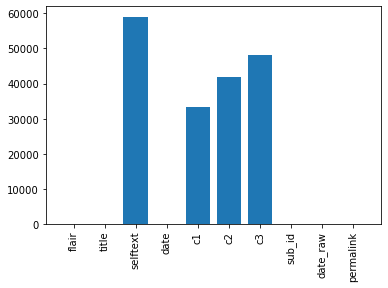

In [81]:
# find number of '' in each column
empty_strings = dict()

for i in columns:
    empty_strings[i] = (df[i] == '').sum()

# pretty print the result
for i in empty_strings:
    print(i, end=": ")
    print(empty_strings[i], end="")
    print(" of {} entries".format(df.shape[0]))
    
# Plot the result as a bar chart
values = [empty_strings[x] for x in columns]
plt.bar(np.arange(len(columns)), values)
plt.xticks(np.arange(len(columns)), columns, rotation=90)
plt.show()

In [78]:
# Information got:
"""
1. some titles are empty, this has happened due to processing text while scraping:
The title may have been purely numeric,
it can also be just a html link,
a username, or a subreddit name,
or just special characters:
the title had not alphabets
2. A lot of selftext is empty, this can be due to:
Only a image, html link as the body,
no alphabets in the post
3. Number of empty top level comments follow expected pattern
number of empty: top level 1 < top level 2 < top level 3
4. Other columns are fine
5. While some reliance on other columns can help, title seems the most useful
"""
# Actions taken
"""
1. Remove all rows having no title
"""

'\n1. Remove all rows having no title\n'

In [82]:
# Remove rows having no title
df = df[df['title'] != '']
df.describe()

,date_raw
count,7.501200e+04
mean,1.560290e+09
std,1.481436e+07
min,1.535795e+09
25%,1.547279e+09
50%,1.559829e+09
75%,1.572592e+09
max,1.586340e+09


Politics: 21386 of 75012
Non-Political: 18316 of 75012
AskIndia: 12610 of 75012
Policy/Economy: 4264 of 75012
Business/Finance: 7353 of 75012
Science/Technology: 3786 of 75012
Scheduled: 498 of 75012
Sports: 1641 of 75012
Food: 961 of 75012
Photography: 2002 of 75012
CAA-NRC-NPR: 35 of 75012
Coronavirus: 2160 of 75012


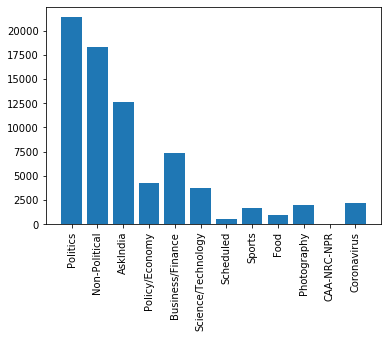

In [80]:
# Count no of data points under all labels
label_count = []
for i in valid_flairs:
    label_count.append((df['flair'] == i).sum())

# Pretty print the data
for i, j in enumerate(valid_flairs):
    print("{}: ".format(j), end='')
    print(label_count[i], end='')
    print(" of {}".format(df.shape[0]))
    
# Plot as bar chart
plt.bar(np.arange(len(valid_flairs)), label_count)
plt.xticks(np.arange(len(valid_flairs)), valid_flairs, rotation=90)
plt.show()

In [ ]:
# TODO
# Information got:
"""
1. Some labels dominate the dataset while very little data is available for others
i.e. dataset is imbalanced
Techniques to balance the dataset need to be used
2. Flairs other than Coronavirus, CAA-NRC-NPR and Scheduled can be boosted by 
scraping more data from the past, as Coronavirus and CAA-NRC-NPR are 'events'
and very little data is available for flair scheduled
3. Flair Coronavirus and CAA-NRC-NPR can be boosted by scraping newer posts
"""
# Action taken
"""
Todo: boost some labels,
learn about methods to work with imbalanced datasets
"""

In [93]:
# Count no of words in text columns
print(columns)
title_word_len = []
c1_word_len = []
c2_word_len = []
c3_word_len = []
selftext_word_len = []
# TODO choose correct method to count words
for index, row in df.iterrows():
    title_word_len.append(len(row['title'].split()))
    c1_word_len.append(sum([x.strip(string.punctuation).isalpha() for x in row['c1'].split()]))
    c2_word_len.append(sum([x.strip(string.punctuation).isalpha() for x in row['c2'].split()]))
    c3_word_len.append(sum([x.strip(string.punctuation).isalpha() for x in row['c3'].split()]))
    selftext_word_len.append(len(row['selftext'].split()))
# pretty print
print('title max:{} min:{} avg:{}'.format(max(title_word_len), min(title_word_len), sum(title_word_len)/len(title_word_len)))
print('c1 max:{} min:{} avg:{}'.format(max(c1_word_len), min(c1_word_len), sum(c1_word_len)/len(c1_word_len)))
print('c2 max:{} min:{} avg:{}'.format(max(c2_word_len), min(c2_word_len), sum(c2_word_len)/len(c2_word_len)))
print('c3 max:{} min:{} avg:{}'.format(max(c3_word_len), min(c3_word_len), sum(c3_word_len)/len(c3_word_len)))
print('selftext max:{} min:{} avg:{}'.format(max(selftext_word_len), min(selftext_word_len), sum(selftext_word_len)/len(selftext_word_len)))

['flair', 'title', 'selftext', 'date', 'c1', 'c2', 'c3', 'sub_id', 'date_raw', 'permalink']
title max:62 min:1 avg:11.638057910734283
c1 max:1778 min:0 avg:19.288713805791073
c2 max:1737 min:0 avg:14.44798165626833
c3 max:1700 min:0 avg:11.167346557884072
selftext max:4644 min:0 avg:28.53180824401429


In [ ]:
# Information got:
"""
Max number of words in a title ~62
This is useful info, but I think a frequency line
plot will be much more useful
I expect a gaussian result
"""
# Information found elsewhere:
"""
Reddit has title length limit 300 chars
Selftext ~10k-40k
comments ~10k
"""

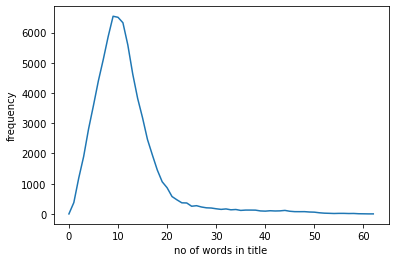

In [108]:
# for title
freq_arr_title = [0 for i in range(0, max(title_word_len)+1)]
for i in title_word_len:
    freq_arr_title[i] += 1
plt.xlabel('no of words in title')
plt.ylabel('frequency')
plt.plot(np.arange(0, max(title_word_len)+1), freq_arr_title)

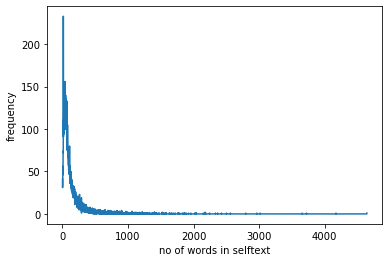

In [115]:
# for selftext
freq_arr_selftext = [0 for i in range(0, max(selftext_word_len)+1)]
for i in selftext_word_len:
    freq_arr_selftext[i] += 1
plt.xlabel('no of words in selftext')
plt.ylabel('frequency')
# lots of selftext with no text influences plot
# plt.plot(np.arange(0, max(selftext_word_len)+1), freq_arr_selftext)
plt.plot(np.arange(1, max(selftext_word_len)+1), freq_arr_selftext[1:])

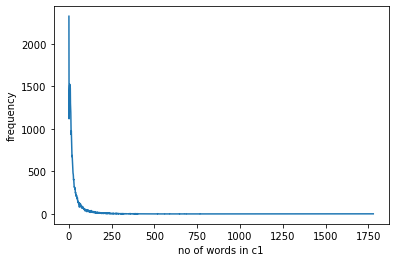

In [114]:
# for c1
freq_arr_c1 = [0 for i in range(0, max(c1_word_len)+1)]
for i in c1_word_len:
    freq_arr_c1[i] += 1
plt.xlabel('no of words in c1')
plt.ylabel('frequency')
plt.plot(np.arange(1, max(c1_word_len)+1), freq_arr_c1[1:])

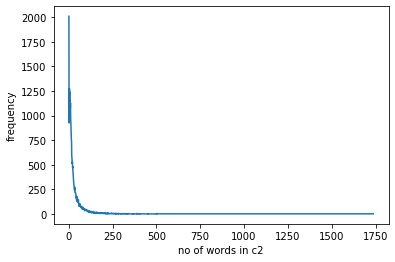

In [116]:
# for c2
freq_arr_c2 = [0 for i in range(0, max(c2_word_len)+1)]
for i in c2_word_len:
    freq_arr_c2[i] += 1
plt.xlabel('no of words in c2')
plt.ylabel('frequency')
plt.plot(np.arange(1, max(c2_word_len)+1), freq_arr_c2[1:])

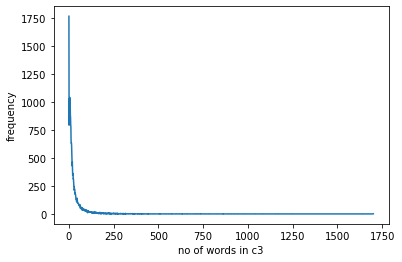

In [117]:
# for c3
freq_arr_c3 = [0 for i in range(0, max(c3_word_len)+1)]
for i in c3_word_len:
    freq_arr_c3[i] += 1
plt.xlabel('no of words in c3')
plt.ylabel('frequency')
plt.plot(np.arange(1, max(c3_word_len)+1), freq_arr_c3[1:])

In [ ]:
# Information got:
"""
1. Title cannot exceed 300 words, and using ~100 words should be enough
2. Selftext, comments have lots of null values
3. These 4 also contain lots of outliers, exceeding thousands of words
"""
# Insights:
"""
Need a network that can process ~100-200 words if using only title,
if using rest of the cols, need more input capacity
"""
# Actions taken:
"""
As selftext can be considered part of title, lets check where the
concatenation of both stands
"""

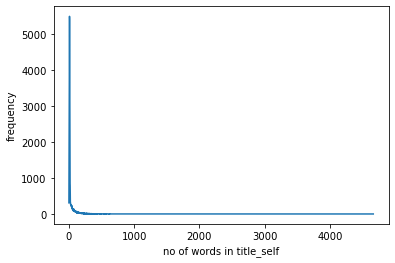

In [119]:
# Testing length for title+selftext
title_self_word_len = [sum(x) for x in zip(title_word_len, selftext_word_len)]
freq_arr_title_self = [0 for i in range(0, max(title_self_word_len)+1)]
for i in title_self_word_len:
    freq_arr_title_self[i] += 1
plt.xlabel('no of words in title_self')
plt.ylabel('frequency')
plt.plot(np.arange(1, max(title_self_word_len)+1), freq_arr_title_self[1:])